In [3]:
#import libraries and dataset
import pandas as pd
from matplotlib import  pyplot
df= pd.read_csv('iris.csv')


In [4]:
#preprocessing
print(df.isnull().values.any())

False


In [6]:
# Summarizing the dataset
# Dimensions of dataset
df.shape

(150, 6)

In [12]:
#peek at the dataset
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [8]:
#statistical summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
#class distribution
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

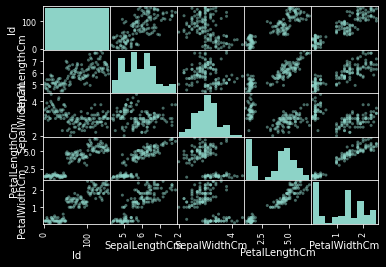

In [17]:
#data visvalization
from pandas.plotting import  scatter_matrix
scatter_matrix(df)
pyplot.show()